In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
df = pd.read_csv('서울시 대기질 자료 제공_2020-2021.csv', encoding='cp949')

In [3]:
df

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2021-12-31 23:00,평균,21.0,9.0
1,2021-12-31 23:00,강남구,21.0,9.0
2,2021-12-31 23:00,강동구,25.0,7.0
3,2021-12-31 23:00,강북구,23.0,12.0
4,2021-12-31 23:00,강서구,28.0,9.0
...,...,...,...,...
456137,2020-01-01 0:00,용산구,12.0,13.0
456138,2020-01-01 0:00,은평구,18.0,12.0
456139,2020-01-01 0:00,종로구,20.0,15.0
456140,2020-01-01 0:00,중구,22.0,18.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
df['미세먼지(PM10)'].skew()

9.278603402063466

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df.drop(['초미세먼지(PM25)'], axis=1, inplace=True)

In [8]:
scaler = StandardScaler()
finedust_array = np.array(df['미세먼지(PM10)']).reshape(-1, 1)
df['미세먼지(PM10)'] = pd.Series(scaler.fit_transform(finedust_array).flatten())

In [9]:
df

,일시,구분,미세먼지(PM10)
0,2021-12-31 23:00,평균,-0.442790
1,2021-12-31 23:00,강남구,-0.442790
2,2021-12-31 23:00,강동구,-0.330444
3,2021-12-31 23:00,강북구,-0.386617
4,2021-12-31 23:00,강서구,-0.246185
...,...,...,...
456137,2020-01-01 0:00,용산구,-0.695568
456138,2020-01-01 0:00,은평구,-0.527050
456139,2020-01-01 0:00,종로구,-0.470877
456140,2020-01-01 0:00,중구,-0.414704


In [10]:
df = df.loc[df['구분'] == '평균']

In [11]:
df

,일시,구분,미세먼지(PM10)
0,2021-12-31 23:00,평균,-0.442790
26,2021-12-31 22:00,평균,-0.470877
52,2021-12-31 21:00,평균,-0.386617
78,2021-12-31 20:00,평균,-0.386617
104,2021-12-31 19:00,평균,-0.414704
...,...,...,...
456012,2020-01-01 4:00,평균,-0.386617
456038,2020-01-01 3:00,평균,-0.330444
456064,2020-01-01 2:00,평균,-0.358531
456090,2020-01-01 1:00,평균,-0.358531


In [12]:
df.reset_index(drop=True)

,일시,구분,미세먼지(PM10)
0,2021-12-31 23:00,평균,-0.442790
1,2021-12-31 22:00,평균,-0.470877
2,2021-12-31 21:00,평균,-0.386617
3,2021-12-31 20:00,평균,-0.386617
4,2021-12-31 19:00,평균,-0.414704
...,...,...,...
17539,2020-01-01 4:00,평균,-0.386617
17540,2020-01-01 3:00,평균,-0.330444
17541,2020-01-01 2:00,평균,-0.358531
17542,2020-01-01 1:00,평균,-0.358531


In [13]:
df = df.loc[::-1]

In [14]:
df

,일시,구분,미세먼지(PM10)
456116,2020-01-01 0:00,평균,-0.414704
456090,2020-01-01 1:00,평균,-0.358531
456064,2020-01-01 2:00,평균,-0.358531
456038,2020-01-01 3:00,평균,-0.330444
456012,2020-01-01 4:00,평균,-0.386617
...,...,...,...
104,2021-12-31 19:00,평균,-0.414704
78,2021-12-31 20:00,평균,-0.386617
52,2021-12-31 21:00,평균,-0.386617
26,2021-12-31 22:00,평균,-0.470877


In [15]:
df = df.reset_index(drop=True)

In [16]:
df

,일시,구분,미세먼지(PM10)
0,2020-01-01 0:00,평균,-0.414704
1,2020-01-01 1:00,평균,-0.358531
2,2020-01-01 2:00,평균,-0.358531
3,2020-01-01 3:00,평균,-0.330444
4,2020-01-01 4:00,평균,-0.386617
...,...,...,...
17539,2021-12-31 19:00,평균,-0.414704
17540,2021-12-31 20:00,평균,-0.386617
17541,2021-12-31 21:00,평균,-0.386617
17542,2021-12-31 22:00,평균,-0.470877


In [17]:
data = df['미세먼지(PM10)'].values.astype(float)

In [18]:
data = data.reshape(-1, 1)

In [19]:
split = int(len(data)*0.67)
train_data = data[:split]
test_data = data[split:]

In [20]:
train_data.shape

(11754, 1)

In [21]:
test_data.shape

(5790, 1)

In [22]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)

In [23]:
look_back=1
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [26]:
X_train.shape

(11753, 1, 1)

In [27]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.1076
Epoch 2/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0779
Epoch 3/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 0.0468
Epoch 4/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s 946us/step - loss: 0.0552
Epoch 5/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s 932us/step - loss: 0.0413
Epoch 6/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0338
Epoch 7/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0321
Epoch 8/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0311
Epoch 9/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.0305
Epoch 10/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s 958us/step - loss: 0.0310
Epoch 11/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s 929us/step - loss: 0.0316
Epoch 12/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s 939us/step - loss: 0.0323
Epoch 13/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s 947us/step - loss: 0.0292
Epoch 14/50
11753/11753 ━━━━━━━━━━━━━━━━━━━━ 11s

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


In [30]:
test_predict

array([[ 0.10820103],
       [ 0.10820103],
       [ 0.16450405],
       ...,
       [-0.37413263],
       [-0.37413263],
       [-0.4599719 ]], dtype=float32)

In [31]:
Y_train.shape

(11753,)

In [32]:
Y_train

array([-0.3585307 , -0.3585307 , -0.33044423, ...,  0.09085287,
        0.09085287,  0.20319876])

In [33]:
Y_train.shape

(11753,)

In [34]:
Y_train

array([-0.3585307 , -0.3585307 , -0.33044423, ...,  0.09085287,
        0.09085287,  0.20319876])

In [35]:
Y_test.shape

(5789,)

In [36]:
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [37]:
Y_train

array([[24., 24., 25., ..., 40., 40., 44.]])

In [38]:
train_score = np.sqrt(np.mean(np.square(Y_train[0]-train_predict[:, 0])))
test_score = np.sqrt(np.mean(np.square(Y_test[0]-test_predict[:, 0])))

In [39]:
print(f'Train score: {train_score} RMSE')
print(f'Test score: {test_score} RMSE')

Train score: 5.656923492190671 RMSE
Test score: 14.020277482818713 RMSE


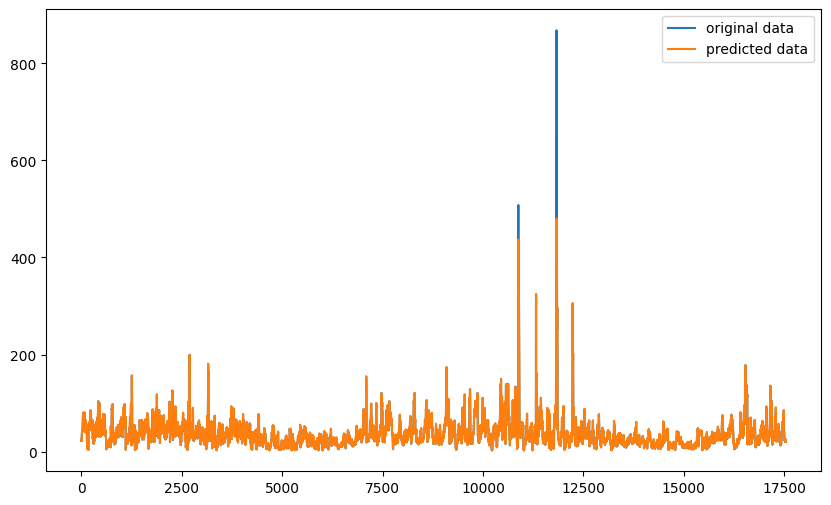

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(data), label='original data')
plt.plot(np.concatenate([train_predict, test_predict]), label='predicted data')
plt.legend()
plt.show()